In [12]:
#cdf =dd.groupby('SUBCLASS').sum().reset_index()
#cdf

In [19]:
#data = pd.read_csv('../input/train.csv')

# SUBCLASS별로 행의 개수와 비율 계산
#subclass_counts = data['SUBCLASS'].value_counts()
#subclass_percentages = (subclass_counts / len(data)) * 100

# SUBCLASS별로 행 개수와 비율을 DataFrame으로 정리
#subclass_distribution = pd.DataFrame({
#    'Count': subclass_counts,
#    'Percentage': subclass_percentages
#})
#subclass_distribution

,Count,Percentage
SUBCLASS,,
BRCA,786,12.675375
KIPAN,515,8.305112
GBMLGG,461,7.434285
STES,379,6.111917
KIRC,334,5.386228
THCA,324,5.224964
SKCM,276,4.450895
PRAD,266,4.289631
OV,253,4.079987


In [968]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('../input/train.csv')
data.drop('ID',axis=1, inplace=True)
data

,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,ABCA4,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,SARC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [969]:
diseaseList = data.SUBCLASS.value_counts().rename_axis('disease').reset_index(name='counts')
diseaseList

,disease,counts
0,BRCA,786
1,KIPAN,515
2,GBMLGG,461
3,STES,379
4,KIRC,334
5,THCA,324
6,SKCM,276
7,PRAD,266
8,OV,253
9,LGG,229


In [971]:
def drawing_class_dist(disease, top=0, base=0):
    df_ = data.copy()
    count_df = df_[df_.SUBCLASS==disease].apply(lambda x : x!='WT').agg(sum)
    count_df = count_df[2:].reset_index(name='count')        
    #num_transaction = diseaseList[diseaseList.disease == disease]['counts'].values[0]
    cdf_sub = count_df[count_df['count']>base]

    print(cdf_sub.sort_values(by='count', ascending=False))
    cdf_sub.plot()
    #sdf = cdf_sub.sort_values(by='count', ascending=False)[top:]

       index  count
3017    PLEC     38
2243   LRIG1     25
3770  SOWAHC     24
845    CMPK2     20
2647   NFKB2     18
...      ...    ...
18     ABCB9      1
19     ABCC1      1
22     ABCC4      1
24     ABCC8      1
25     ABCD1      1

[1580 rows x 2 columns]


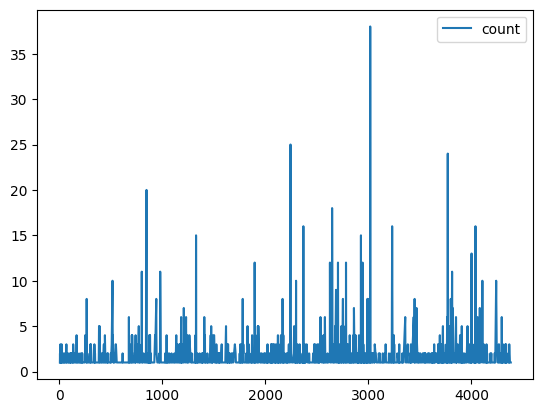

In [972]:
#drawing_class_dist('ACC', 0, 0)

In [ ]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import xgboost as xgb 
from xgboost import XGBClassifier, plot_importance
from itertools import combinations

# 로지스틱 회귀 모델 학습
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [ ]:
command_r('BRCA', 0, 3, 'rf', 0.80)
command_r('KIPAN', 0, 1, 'logi', 0.63)
command_r('GBMLGG', 0, 0, 'logi', 0.62)
command_r('STES', 0, 0, 'logi', 0.81) #0.73
command_r('KIRC', 0, 0, 'rf', 0.74) # 0.4
command_r('THCA', 0, 0, 'rf', 0.83)#0.73
command_r('SKCM', 0, 5, 'rf', 0.88) #87 
command_r('PRAD', 0, 0, 'rf', 0.71)
command_r('OV', 1, 0, 'rf', 0.65)#0.63 (1,0) 0.63
command_r('LGG', 2, 0, 'rf', 0.73) #2,0  0.7
command_r('HNSC', 2, 1, 'rf', 0.739)#1,0 0.74 / 0,0 0.75
command_r('COAD', 0, 2, 'rf', 0.85)#0,0 0.9/
command_r('UCEC', 0, 2, 'rf', 0.7169)#0.729
command_r('SARC', 0, 2, 'rf', 0.716)#0.729
command_r('LUAD', 0, 2, 'rf', 0.71)
command_r('LUSC', 0, 2, 'rf', 0.735)
command_r('LIHC', 0, 1, 'rf', 0.70) #0,2 0.69
command_r('LAML', 0, 0, 'rf', 0.68)
command_r('CESC', 0, 2, 'rf', 0.72) #0.716
command_r('PCPG', 0, 0, 'rf', 0.72)
command_r('TGCT', 0, 0, 'rf', 0.69)
command_r('PAAD', 0, 1, 'rf', 0.758)
command_r('BLCA', 0, 0, 'rf', 0.67)
command_r('THYM', 0, 0, 'rf', 0.5)
command_r('ACC', 0, 1, 'rf', 0.875) #0,0 0.9
command_r('DLBC', 0, 0, 'rf', 0.65)

In [1002]:
train_data =pd.read_csv('../input/train.csv')
test_data = pd.read_csv('../input/test.csv')

In [973]:
def get_genes(disease, top=0, base=0):
    print(disease)
    df_= data.copy()
    count_df = df_[df_.SUBCLASS==disease].apply(lambda x : x!='WT').agg(sum)
    count_df = count_df[2:].reset_index(name='count')
    cdf_sub = count_df[count_df['count']>base]
    #print(cdf_sub.sort_values(by='count', ascending=False))
    sdf = cdf_sub.sort_values(by='count', ascending=False)[top:]
    return list(sdf['index'].values)  

In [974]:
def get_logi_classifier(X_train, y_train):
    clf1 = LogisticRegression()
    clf1.fit(X_train, y_train)

    return clf1

In [975]:
from sklearn.ensemble import RandomForestClassifier
def get_rf_classifier(X_train, y_train):
    clf = RandomForestClassifier(
        n_estimators= 500,             # 트리의 개수 (너무 적으면 모델이 불안정하고, 너무 많으면 학습 시간이 오래 걸림)
        max_features= 'sqrt',          # 각 트리에서 선택할 피처의 수 (sqrt는 약 63개 피처를 사용, 피처가 많을 때 좋은 기본값)
        max_depth= None,               # 트리의 최대 깊이 (None이면 트리가 완전히 성장할 때까지 분할)
        min_samples_split= 2,          # 노드를 분할하기 위한 최소 샘플 수 (default값)
        min_samples_leaf= 1,           # 리프 노드에 있어야 하는 최소 샘플 수 (default값)
        bootstrap= True,               # 부트스트랩 샘플링을 사용할지 여부 (default는 True, 부트스트랩을 사용하면 트리 간의 다양성을 증가)
        n_jobs= -1,                    # 가능한 모든 CPU 코어를 사용하여 학습 (병렬 처리)
        random_state= 42,              # 재현성을 위해 랜덤 시드 설정
        class_weight='balanced',      # 데이터 불균형일 경우 자동으로 가중치 조정
        verbose=1                     # 학습 과정에서 출력 메시지 (진행 상황을 확인할 수 있음)
        )
    clf.fit(X_train, y_train)
    #y_pred = clf.predict(X_test)
    return clf

In [976]:

# 각 서브클래스별로 사용할 주요 컬럼 그룹을 정의
#features_kipan = ['feature_1', 'feature_2', 'feature_3']  # KIPAN에 중요한 컬럼
#features_gbmlgg = ['feature_4', 'feature_5']               # GBMLGG에 중요한 컬럼
#features_brca = ['feature_6', 'feature_7']                 # BRCA에 중요한 컬럼

f0 = get_genes('BRCA', 0, 3)
f1 = get_genes('KIPAN', 0, 1)
f2 = get_genes('GBMLGG', 0)
f3 = get_genes('STES', 0, 0)
f4 = get_genes('KIRC', 0, 0)
f5 = get_genes('THCA', 0, 0)
f6 = get_genes('SKCM', 0, 5)
f7 = get_genes('PRAD', 0, 0)
f8 = get_genes('OV', 1, 0)
f9 = get_genes('LGG', 2, 0)
f10 = get_genes('HNSC', 2, 1)
f11 = get_genes('COAD', 0, 2)
f12 = get_genes('UCEC', 0, 2)
f13 = get_genes('SARC', 0, 2)
f14 = get_genes('LUAD', 0, 2)
f15 = get_genes('LUSC', 0, 2)
f16 = get_genes('LIHC', 0, 1)
f17 = get_genes('LAML', 0, 0)
f18 = get_genes('CESC', 0, 2)
f19 = get_genes('PCPG', 0, 0)
f20 = get_genes('TGCT', 0, 0)
f21 = get_genes('PAAD', 0, 1)
f22 = get_genes('BLCA', 0, 0)
f23 = get_genes('THYM', 0, 0)
f24 = get_genes('ACC', 0, 1)
f25 = get_genes('DLBC', 0, 0)

BRCA
KIPAN
GBMLGG
STES
KIRC
THCA
SKCM
PRAD
OV
LGG
HNSC
COAD
UCEC
SARC
LUAD
LUSC
LIHC
LAML
CESC
PCPG
TGCT
PAAD
BLCA
THYM
ACC
DLBC


In [1076]:
ref0 = pd.read_csv('../reference_data/BRCA.csv')
fr0 = set(ref0['g.name']).intersection(set(f0))

ref1= pd.read_csv('../reference_data/KIPAN.csv')
fr1 = set(ref1['g.name']).intersection(set(f1))

ref2  = pd.read_csv('../reference_data/GBMLGG.csv')
fr2 = set(ref2['g.name']).intersection(set(f2))

ref3  = pd.read_csv('../reference_data/STES.csv')
fr3  = set(ref3['g.name']).intersection(set(f3))

ref4  = pd.read_csv('../reference_data/KIRC.csv')
fr4  = set(ref4['g.name']).intersection(set(f4))

ref5  = pd.read_csv('../reference_data/THCA.csv')
fr5 = set(ref5['g.name']).intersection(set(f5))

ref6  = pd.read_csv('../reference_data/SKCM.csv')
fr6 = set(ref6['g.name']).intersection(set(f6))

ref7  = pd.read_csv('../reference_data/PRAD.csv')
fr7  = set(ref7['g.name']).intersection(set(f7))


In [1077]:
ref8  = pd.read_csv('../reference_data/OV.csv')
fr8 = set(ref8['g.name']).intersection(set(f8))

ref9  = pd.read_csv('../reference_data/LGG.csv')
fr9  = set(ref9['g.name']).intersection(set(f9))

ref10  = pd.read_csv('../reference_data/HNSC.csv')
fr10  = set(ref10['g.name']).intersection(set(f10))

ref11  = pd.read_csv('../reference_data/COAD.csv')
fr11 = set(ref11['g.name']).intersection(set(f11))

ref12  = pd.read_csv('../reference_data/UCEC.csv')
fr12 = set(ref12['g.name']).intersection(set(f12))

ref13  = pd.read_csv('../reference_data/SARC.csv')
fr13 = set(ref13['g.name']).intersection(set(f13))

ref14  = pd.read_csv('../reference_data/LUAD.csv')
fr14 = set(ref14['g.name']).intersection(set(f14))



FileNotFoundError: [Errno 2] No such file or directory: '../reference_data/LUAD.csv'

In [1078]:

ref15  = pd.read_csv('../reference_data/LUSC.csv')
fr15 = set(ref15['g.name']).intersection(set(f15))

ref16  = pd.read_csv('../reference_data/LIHC.csv')
fr16 = set(ref16['g.name']).intersection(set(f16))

ref17  = pd.read_csv('../reference_data/LAML.csv')
fr17 = set(ref17['g.name']).intersection(set(f17))

ref18  = pd.read_csv('../reference_data/CESC.csv')
fr18 = set(ref18['g.name']).intersection(set(f18))

ref19  = pd.read_csv('../reference_data/PCPG.csv')
fr19 = set(ref19['g.name']).intersection(set(f19))


FileNotFoundError: [Errno 2] No such file or directory: '../reference_data/PCPG.csv'

In [1079]:

ref20  = pd.read_csv('../reference_data/TGCT.csv')
fr20 = set(ref20['g.name']).intersection(set(f20))

ref21  = pd.read_csv('../reference_data/PAAD.csv')
fr21 = set(ref21['g.name']).intersection(set(f21))

ref22  = pd.read_csv('../reference_data/BLCA.csv')
fr22 = set(ref22['g.name']).intersection(set(f22))

ref23  = pd.read_csv('../reference_data/THYM.csv')
fr23 = set(ref23['g.name']).intersection(set(f23))

ref24  = pd.read_csv('../reference_data/ACC.csv')
fr24= set(ref24['g.name']).intersection(set(f24))

ref25  = pd.read_csv('../reference_data/DLBC.csv')
fr25 = set(ref25['g.name']).intersection(set(f25))


In [1086]:
train_data

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
1,TRAIN_0001,SARC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
2,TRAIN_0002,SKCM,R895R,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
3,TRAIN_0003,KIRC,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
4,TRAIN_0004,GBMLGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,TRAIN_6196,LUAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6197,TRAIN_6197,LGG,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6198,TRAIN_6198,COAD,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,T181S,WT
6199,TRAIN_6199,TGCT,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [1095]:
ff = [] 




In [1099]:
ff0=set(train_data.columns).intersection(set(ref0['g.name']))
ff1=set(train_data.columns).intersection(set(ref1['g.name']))
ff2=set(train_data.columns).intersection(set(ref2['g.name']))
ff3=set(train_data.columns).intersection(set(ref3['g.name']))
ff4=set(train_data.columns).intersection(set(ref4['g.name']))
ff5=set(train_data.columns).intersection(set(ref5['g.name']))
ff6=set(train_data.columns).intersection(set(ref6['g.name']))
ff7=set(train_data.columns).intersection(set(ref7['g.name']))
ff8=set(train_data.columns).intersection(set(ref8['g.name']))
ff9=set(train_data.columns).intersection(set(ref9['g.name']))
ff10=set(train_data.columns).intersection(set(ref10['g.name']))
ff11=set(train_data.columns).intersection(set(ref11['g.name']))
ff12=set(train_data.columns).intersection(set(ref12['g.name']))
ff13=set(train_data.columns).intersection(set(ref13['g.name']))
#ff14=set(train_data.columns).intersection(set(ref14['g.name']))
ff15=set(train_data.columns).intersection(set(ref15['g.name']))
ff16=set(train_data.columns).intersection(set(ref16['g.name']))
ff17=set(train_data.columns).intersection(set(ref17['g.name']))
ff18=set(train_data.columns).intersection(set(ref18['g.name']))
#ff19=set(train_data.columns).intersection(set(ref19['g.name']))
ff20=set(train_data.columns).intersection(set(ref20['g.name']))
ff21=set(train_data.columns).intersection(set(ref21['g.name']))
ff22=set(train_data.columns).intersection(set(ref22['g.name']))
ff23=set(train_data.columns).intersection(set(ref23['g.name']))
ff24=set(train_data.columns).intersection(set(ref24['g.name']))
ff25=set(train_data.columns).intersection(set(ref25['g.name']))

In [1075]:
len(f8)

1956

In [1105]:
y = train_data['SUBCLASS']
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)

In [1030]:
disease = ['BRCA','KIPAN','GBMLGG','STES','KIRC','THCA','SKCM','PRAD','OV','LGG','HNSC','COAD','UCEC','SARC','LUAD','LUSC','LIHC','LAML','CESC','PCPG','TGCT','PAAD','BLCA''THYM','ACC','DLBC']

In [1103]:
X_f0

,TGM2,LOXL2,ELL,GPX1,THRB,PPM1D,EPHB4,RACGAP1,HHEX,CXCL9,...,RRM2,ALDOA,ARID5B,TGFBI,BIN1,CKS2,CSTF3,ERBB3,VDR,PDK4
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6196,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6197,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6198,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6199,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [1107]:
len(y)

6201

In [1154]:
# f0 BRCA 위한 분류기
X_f0 = train_data.loc[:, list(ff0)]
X_f0 = X_f0.applymap(lambda x : 0 if x=='WT' else 1)
X_train_f0, X_test_f0, y_train_f0, y_test_f0 = train_test_split(X_f0, y, test_size = 0.3, random_state=156) 
clf_f0 = get_rf_classifier(X_train_f0, y_train_f0)
y_pred = clf_f0.predict_proba(df_test.loc[:, list(ff0)])
f0_list=[]
for line1 in y_pred:
    f0_list.append(line1.max())
len(f0_list)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


2546

In [1156]:
tdf = train_data[train_data.SUBCLASS=='KIPAN']
tdf

,ID,SUBCLASS,A2M,AAAS,AADAT,AARS1,ABAT,ABCA1,ABCA2,ABCA3,...,ZNF292,ZNF365,ZNF639,ZNF707,ZNFX1,ZNRF4,ZPBP,ZW10,ZWINT,ZYX
0,TRAIN_0000,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
16,TRAIN_0016,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
17,TRAIN_0017,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
59,TRAIN_0059,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
66,TRAIN_0066,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6132,TRAIN_6132,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,S196G,WT,WT,WT,WT,WT
6137,TRAIN_6137,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6163,TRAIN_6163,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT
6186,TRAIN_6186,KIPAN,WT,WT,WT,WT,WT,WT,WT,WT,...,WT,WT,WT,WT,WT,WT,WT,WT,WT,WT


In [1157]:
# f1 KIPAN을 위한 분류기
X_f1 = train_data.loc[:, list(ff1)]
X_f1 = X_f1.applymap(lambda x : 0 if x=='WT' else 1)
X_train_f1, X_test_f1, y_train_f1, y_test_f1 = train_test_split(X_f1, y, test_size = 0.3, random_state=156) 
clf_f1 = get_rf_classifier(X_train_f1, y_train_f1) #RandomForestClassifier() 

y_pred = clf_f1.predict_proba(df_test.loc[:, list(ff1)])
f1_list=[]
for line1 in y_pred:
    f1_list.append(line1.max())
len(f1_list)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.5s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


2546

In [1158]:
res_arr = np.column_stack((f0_list, f1_list))
res_arr

array([[1., 1.],
       [1., 1.],
       [1., 1.],
       ...,
       [1., 1.],
       [1., 1.],
       [1., 1.]])

In [1112]:
max_columns = np.argmax(res_arr, axis=1)

In [1113]:
max_columns

array([1, 1, 0, ..., 1, 0, 0])

In [1118]:
# f2 command_r('GBMLGG', 0, 0, 'logi', 0.62)
def get_res_list(sclass, features, ctype):
    res_list = []
    X = train_data.loc[:, list(features)]
    X = X.applymap(lambda x : 0 if x=='WT' else 1)
    X_train_f1, _, y_train_f1, _ = train_test_split(X, y, test_size = 0.3, random_state=156) 
    
    clf_fx = get_rf_classifier(X_train_f1, y_train_f1) 
    if ctype == 'logi':
        clf_fx = get_logi_classifier(X_train_f1, y_train_f1)
    y_pred = clf_fx.predict_proba(df_test.loc[:, list(features)])
    
    for line1 in y_pred:
        res_list.append(line1.max())
    print(sclass, len(res_list))
    return res_list

#f3 command_r('STES', 0, 0, 'logi', 0.81) #0.73

In [1119]:
#res_arr = np.column_stack((res_arr, rlist))
res_arr

array([[0.20971087, 0.23266374],
       [0.202     , 0.99677407],
       [0.168     , 0.1233505 ],
       ...,
       [0.316     , 0.99090573],
       [0.16698461, 0.12646705],
       [0.37679787, 0.1233505 ]])

In [1120]:
import numpy as np 
rlist = get_res_list('GBMLGG', ff2, 'logi')
#

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished


GBMLGG 2546


In [1121]:
res_arr = np.column_stack((res_arr, rlist))
res_arr

array([[0.20971087, 0.23266374, 0.21200249],
       [0.202     , 0.99677407, 0.52863337],
       [0.168     , 0.1233505 , 0.1482251 ],
       ...,
       [0.316     , 0.99090573, 0.57924835],
       [0.16698461, 0.12646705, 0.14297567],
       [0.37679787, 0.1233505 , 0.46557616]])

In [1123]:
rlist = get_res_list('STES', ff3, 'logi')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished


STES 2546


array([[0.20971087, 0.23266374, 0.21200249, 0.19612629],
       [0.202     , 0.99677407, 0.52863337, 0.25359826],
       [0.168     , 0.1233505 , 0.1482251 , 0.14445191],
       ...,
       [0.316     , 0.99090573, 0.57924835, 0.9249606 ],
       [0.16698461, 0.12646705, 0.14297567, 0.59744306],
       [0.37679787, 0.1233505 , 0.46557616, 0.14445191]])

In [1124]:
rlist = get_res_list('KIRC', ff4, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.8s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


KIRC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, 0.19612629, 0.05644045],
       [0.202     , 0.99677407, 0.52863337, 0.25359826, 0.15282781],
       [0.168     , 0.1233505 , 0.1482251 , 0.14445191, 0.05644045],
       ...,
       [0.316     , 0.99090573, 0.57924835, 0.9249606 , 0.172     ],
       [0.16698461, 0.12646705, 0.14297567, 0.59744306, 0.05644045],
       [0.37679787, 0.1233505 , 0.46557616, 0.14445191, 0.05644045]])

In [1125]:
#f5 = get_genes('THCA', 0, 0)
rlist = get_res_list('THCA', ff5, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


THCA 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, 0.19612629, 0.05644045,
        0.1383737 ],
       [0.202     , 0.99677407, 0.52863337, 0.25359826, 0.15282781,
        0.453803  ],
       [0.168     , 0.1233505 , 0.1482251 , 0.14445191, 0.05644045,
        0.15580118],
       ...,
       [0.316     , 0.99090573, 0.57924835, 0.9249606 , 0.172     ,
        0.502     ],
       [0.16698461, 0.12646705, 0.14297567, 0.59744306, 0.05644045,
        0.07025364],
       [0.37679787, 0.1233505 , 0.46557616, 0.14445191, 0.05644045,
        0.07025364]])

In [1126]:
#f6 = get_genes('SKCM', 0, 5)
rlist = get_res_list('SKCM', ff6, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


SKCM 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.05644045, 0.1383737 ,
        0.39270928],
       [0.202     , 0.99677407, 0.52863337, ..., 0.15282781, 0.453803  ,
        0.2695202 ],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.05644045, 0.15580118,
        0.06547412],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.172     , 0.502     ,
        0.292     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.05644045, 0.07025364,
        0.06547412],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.05644045, 0.07025364,
        0.06547412]])

In [1127]:
#f7 = get_genes('PRAD', 0, 0)
rlist = get_res_list('PRAD', ff7, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.0s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


PRAD 2546


[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.1383737 , 0.39270928,
        0.20498049],
       [0.202     , 0.99677407, 0.52863337, ..., 0.453803  , 0.2695202 ,
        0.376     ],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.15580118, 0.06547412,
        0.12042469],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.502     , 0.292     ,
        0.28      ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.07025364, 0.06547412,
        0.12042469],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.07025364, 0.06547412,
        0.12042469]])

In [1128]:
#f8 = get_genes('OV', 1, 0)
rlist = get_res_list('OV', ff8, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


OV 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.39270928, 0.20498049,
        0.65589227],
       [0.202     , 0.99677407, 0.52863337, ..., 0.2695202 , 0.376     ,
        0.622     ],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.06547412, 0.12042469,
        0.19721354],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.292     , 0.28      ,
        0.338     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.06547412, 0.12042469,
        0.0873156 ],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.06547412, 0.12042469,
        0.0873156 ]])

In [1129]:
#f9 = get_genes('LGG', 2, 0)
rlist = get_res_list('LGG', ff9, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


LGG 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.20498049, 0.65589227,
        0.48707938],
       [0.202     , 0.99677407, 0.52863337, ..., 0.376     , 0.622     ,
        0.28698855],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.12042469, 0.19721354,
        0.07440454],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.28      , 0.338     ,
        0.22574522],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.12042469, 0.0873156 ,
        0.07440454],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.12042469, 0.0873156 ,
        0.48153333]])

In [1130]:
#f10 = get_genes('HNSC', 2, 1)
rlist = get_res_list('HNSC', ff10, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


HNSC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.65589227, 0.48707938,
        0.14369212],
       [0.202     , 0.99677407, 0.52863337, ..., 0.622     , 0.28698855,
        0.37382808],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.19721354, 0.07440454,
        0.06837821],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.338     , 0.22574522,
        0.1646909 ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.0873156 , 0.07440454,
        0.06837821],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.0873156 , 0.48153333,
        0.06837821]])

In [1131]:
#f11 = get_genes('COAD', 0, 2)
rlist = get_res_list('COAD', ff11, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


COAD 2546


[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.48707938, 0.14369212,
        0.31447477],
       [0.202     , 0.99677407, 0.52863337, ..., 0.28698855, 0.37382808,
        0.23634434],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.07440454, 0.06837821,
        0.11404244],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.22574522, 0.1646909 ,
        0.256     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.07440454, 0.06837821,
        1.        ],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.48153333, 0.06837821,
        0.11404244]])

In [1132]:
#f12 = get_genes('UCEC', 0, 2)
rlist = get_res_list('UCEC', ff12, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


UCEC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.14369212, 0.31447477,
        0.15085519],
       [0.202     , 0.99677407, 0.52863337, ..., 0.37382808, 0.23634434,
        0.75625227],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.06837821, 0.11404244,
        0.07549751],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.1646909 , 0.256     ,
        0.374     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.06837821, 1.        ,
        0.07549751],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.06837821, 0.11404244,
        0.07549751]])

In [1133]:
#f13 = get_genes('SARC', 0, 2)
rlist = get_res_list('SARC', ff13, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr


[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


SARC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.31447477, 0.15085519,
        0.28499389],
       [0.202     , 0.99677407, 0.52863337, ..., 0.23634434, 0.75625227,
        0.54741761],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.11404244, 0.07549751,
        0.06527683],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.256     , 0.374     ,
        0.18560714],
       [0.16698461, 0.12646705, 0.14297567, ..., 1.        , 0.07549751,
        0.83823847],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.11404244, 0.07549751,
        0.06527683]])

In [1134]:
#f14 = get_genes('LUAD', 0, 2)
rlist = get_res_list('LUAD', f14, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    2.3s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


LUAD 2546


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.15085519, 0.28499389,
        0.194     ],
       [0.202     , 0.99677407, 0.52863337, ..., 0.75625227, 0.54741761,
        0.122     ],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.07549751, 0.06527683,
        0.51454932],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.374     , 0.18560714,
        0.306     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.07549751, 0.83823847,
        0.972     ],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.07549751, 0.06527683,
        0.75619698]])

In [1135]:
#f15 = get_genes('LUSC', 0, 2)
rlist = get_res_list('LUSC', ff15, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


LUSC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.28499389, 0.194     ,
        0.14943162],
       [0.202     , 0.99677407, 0.52863337, ..., 0.54741761, 0.122     ,
        0.3684141 ],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.06527683, 0.51454932,
        0.11653009],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.18560714, 0.306     ,
        0.266     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.83823847, 0.972     ,
        0.11653009],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.06527683, 0.75619698,
        0.11653009]])

In [1136]:
#f16 = get_genes('LIHC', 0, 1)
rlist = get_res_list('LIHC', ff16, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


LIHC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.194     , 0.14943162,
        0.67169785],
       [0.202     , 0.99677407, 0.52863337, ..., 0.122     , 0.3684141 ,
        0.36702798],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.51454932, 0.11653009,
        0.08996482],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.306     , 0.266     ,
        0.242     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.972     , 0.11653009,
        0.08996482],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.75619698, 0.11653009,
        0.08996482]])

In [1137]:
#f17 = get_genes('LAML', 0, 0)
rlist = get_res_list('LAML', ff17, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


LAML 2546


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.14943162, 0.67169785,
        0.36      ],
       [0.202     , 0.99677407, 0.52863337, ..., 0.3684141 , 0.36702798,
        0.24915006],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.11653009, 0.08996482,
        0.23700685],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.266     , 0.242     ,
        0.27      ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.11653009, 0.08996482,
        1.        ],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.11653009, 0.08996482,
        0.53992657]])

In [1138]:
#f18 = get_genes('CESC', 0, 2)
rlist = get_res_list('CESC', ff18, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


CESC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.67169785, 0.36      ,
        0.13264124],
       [0.202     , 0.99677407, 0.52863337, ..., 0.36702798, 0.24915006,
        0.66115656],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.08996482, 0.23700685,
        0.0676837 ],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.242     , 0.27      ,
        0.26471501],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.08996482, 1.        ,
        0.0676837 ],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.08996482, 0.53992657,
        0.0676837 ]])

In [1139]:
#f19 = get_genes('PCPG', 0, 0)
rlist = get_res_list('PCPG', f19, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.2s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


PCPG 2546


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.36      , 0.13264124,
        0.258     ],
       [0.202     , 0.99677407, 0.52863337, ..., 0.24915006, 0.66115656,
        0.144     ],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.23700685, 0.0676837 ,
        0.64622607],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.27      , 0.26471501,
        0.306     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 1.        , 0.0676837 ,
        0.69579098],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.53992657, 0.0676837 ,
        0.35484088]])

In [1140]:
#f20 = get_genes('TGCT', 0, 0)
rlist = get_res_list('TGCT', ff20, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


TGCT 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.13264124, 0.258     ,
        0.04191637],
       [0.202     , 0.99677407, 0.52863337, ..., 0.66115656, 0.144     ,
        0.17065983],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.0676837 , 0.64622607,
        0.04191637],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.26471501, 0.306     ,
        0.36632578],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.0676837 , 0.69579098,
        0.04191637],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.0676837 , 0.35484088,
        0.04191637]])

In [1141]:
#f21 = get_genes('PAAD', 0, 1)
rlist = get_res_list('PAAD', ff21, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.9s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


PAAD 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.258     , 0.04191637,
        0.20793625],
       [0.202     , 0.99677407, 0.52863337, ..., 0.144     , 0.17065983,
        0.31295463],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.64622607, 0.04191637,
        0.90473553],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.306     , 0.36632578,
        0.288     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.69579098, 0.04191637,
        0.36190171],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.35484088, 0.04191637,
        0.6269888 ]])

In [1142]:
#f22 = get_genes('BLCA', 0, 0)
rlist = get_res_list('BLCA', ff22, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


BLCA 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.04191637, 0.20793625,
        0.57359599],
       [0.202     , 0.99677407, 0.52863337, ..., 0.17065983, 0.31295463,
        0.40315194],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.04191637, 0.90473553,
        0.07740839],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.36632578, 0.288     ,
        0.256     ],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.04191637, 0.36190171,
        0.07740839],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.04191637, 0.6269888 ,
        0.07740839]])

In [1143]:
#f23 = get_genes('THYM', 0, 0)
rlist = get_res_list('THYM', ff23, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


THYM 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.20793625, 0.57359599,
        0.124871  ],
       [0.202     , 0.99677407, 0.52863337, ..., 0.31295463, 0.40315194,
        0.19325521],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.90473553, 0.07740839,
        0.05689029],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.288     , 0.256     ,
        0.32059465],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.36190171, 0.07740839,
        0.05689029],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.6269888 , 0.07740839,
        0.05689029]])

In [1144]:
#f24 = get_genes('ACC', 0, 1)
rlist = get_res_list('ACC', ff24, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.7s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s


ACC 2546


[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.57359599, 0.124871  ,
        0.14032492],
       [0.202     , 0.99677407, 0.52863337, ..., 0.40315194, 0.19325521,
        0.24312257],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.07740839, 0.05689029,
        0.06660189],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.256     , 0.32059465,
        0.50381818],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.07740839, 0.05689029,
        0.06660189],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.07740839, 0.05689029,
        0.06660189]])

In [1145]:
#f25 = get_genes('DLBC', 0, 0)
rlist = get_res_list('DLBC', ff25, 'rf')
res_arr = np.column_stack((res_arr, rlist))
res_arr

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    0.6s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s


DLBC 2546


[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


array([[0.20971087, 0.23266374, 0.21200249, ..., 0.124871  , 0.14032492,
        0.04072439],
       [0.202     , 0.99677407, 0.52863337, ..., 0.19325521, 0.24312257,
        0.85386445],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.05689029, 0.06660189,
        0.04072439],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.32059465, 0.50381818,
        0.39335616],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.05689029, 0.06660189,
        0.85386445],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.05689029, 0.06660189,
        0.04072439]])

In [1146]:
len(res_arr[0])

26

In [1147]:
max_columns = np.argmax(res_arr, axis=1)

In [1148]:
res_arr

array([[0.20971087, 0.23266374, 0.21200249, ..., 0.124871  , 0.14032492,
        0.04072439],
       [0.202     , 0.99677407, 0.52863337, ..., 0.19325521, 0.24312257,
        0.85386445],
       [0.168     , 0.1233505 , 0.1482251 , ..., 0.05689029, 0.06660189,
        0.04072439],
       ...,
       [0.316     , 0.99090573, 0.57924835, ..., 0.32059465, 0.50381818,
        0.39335616],
       [0.16698461, 0.12646705, 0.14297567, ..., 0.05689029, 0.06660189,
        0.85386445],
       [0.37679787, 0.1233505 , 0.46557616, ..., 0.05689029, 0.06660189,
        0.04072439]])

In [1149]:
max_columns

array([16,  1, 21, ...,  1, 11, 14])

In [1150]:
len(max_columns)

2546

In [1151]:
res_ensemble = encoder2.inverse_transform(max_columns)

In [1152]:

df_test1 = pd.read_csv('../input/test.csv')
res_df = pd.DataFrame ({'ID' : df_test1['ID'], 'SUBCLASS' : res_ensemble})
res_df
res_df.to_csv('res-ensemble02.csv',index = False)

In [1153]:
res_df.SUBCLASS.value_counts()

SUBCLASS
BLCA      230
OV        216
ACC       208
LGG       188
SARC      184
LUSC      174
BRCA      170
PCPG      157
PAAD      144
KIPAN     133
HNSC      130
STES      123
KIRC      107
LIHC       68
LAML       64
TGCT       60
DLBC       39
LUAD       29
PRAD       29
THYM       27
GBMLGG     25
COAD       18
CESC       11
THCA        6
SKCM        4
UCEC        2
Name: count, dtype: int64

In [946]:
query_d = 'LAML'

In [955]:
selectedg = get_gset(query_d, 0, 0)
data1 = train_data.loc[:, list(selectedg)]
test1 = test_data.loc[:, list(selectedg)]
total = pd.concat([data1, test1])
total = total.applymap(lambda x : 0 if x=='WT' else 1)

nRows = train_data.shape[0]
X = total[:nRows]
df_test = total[nRows:]
y = train_data['SUBCLASS']
encoder2 = LabelEncoder()
y = encoder2.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=156)  

        index  count
2712     NPM1     41
1888     IDH1     18
1889     IDH2     17
3463    RUNX1     12
4107     TP53     11
...       ...    ...
811    CLDN14      1
814    CLDN18      1
829     CLIP2      1
855     CNOT6      1
302   ARHGEF6      1

[316 rows x 2 columns]


In [964]:
# 어떤 문자열이 어떤 숫자로 매핑되었는지 확인
class_mapping = dict(zip(encoder2.classes_, range(len(encoder2.classes_))))

# 결과 출력
print(f"원본 문자열과 변환된 값의 매핑: {class_mapping}")

원본 문자열과 변환된 값의 매핑: {'ACC': 0, 'BLCA': 1, 'BRCA': 2, 'CESC': 3, 'COAD': 4, 'DLBC': 5, 'GBMLGG': 6, 'HNSC': 7, 'KIPAN': 8, 'KIRC': 9, 'LAML': 10, 'LGG': 11, 'LIHC': 12, 'LUAD': 13, 'LUSC': 14, 'OV': 15, 'PAAD': 16, 'PCPG': 17, 'PRAD': 18, 'SARC': 19, 'SKCM': 20, 'STES': 21, 'TGCT': 22, 'THCA': 23, 'THYM': 24, 'UCEC': 25}


In [956]:
#To compare
#query_d = 'B'
X_test2 = X[train_data['SUBCLASS']==query_d]
X_test2.shape

(158, 316)

In [957]:
y_test2 = [class_mapping[query_d]] * X_test2.shape[0]
len(y_test2)

158

In [959]:
#Logi
clf = LogisticRegression()
clf.fit(X_train, y_train)

# 테스트 데이터에 대한 예측
y_pred = clf.predict(X_test)
#probability = clf.predict_proba(new_data)

# 모델 성능 평가
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')


Accuracy: 0.21708758731864589


In [960]:
# 테스트 데이터에 대한 예측
y_pred = clf.predict(X_test2)

# 모델 성능 평가
accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)
class_report = classification_report(y_test2, y_pred)

print(f'Accuracy: {accuracy}')
#print('Confusion Matrix:')
#print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.45569620253164556
Classification Report:
              precision    recall  f1-score   support

           2       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       1.00      0.46      0.63       158
          11       0.00      0.00      0.00         0
          15       0.00      0.00      0.00         0
          16       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         0
          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         0
          21       0.00      0.00      0.00         0
          22       0.00      0.00      0.00         0
          23       0.00      0.00      0.00         0

    accuracy               

In [961]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(
    n_estimators= 500,             # 트리의 개수 (너무 적으면 모델이 불안정하고, 너무 많으면 학습 시간이 오래 걸림)
    max_features= 'sqrt',          # 각 트리에서 선택할 피처의 수 (sqrt는 약 63개 피처를 사용, 피처가 많을 때 좋은 기본값)
    max_depth= None,               # 트리의 최대 깊이 (None이면 트리가 완전히 성장할 때까지 분할)
    min_samples_split= 2,          # 노드를 분할하기 위한 최소 샘플 수 (default값)
    min_samples_leaf= 1,           # 리프 노드에 있어야 하는 최소 샘플 수 (default값)
    bootstrap= True,               # 부트스트랩 샘플링을 사용할지 여부 (default는 True, 부트스트랩을 사용하면 트리 간의 다양성을 증가)
    n_jobs= -1,                    # 가능한 모든 CPU 코어를 사용하여 학습 (병렬 처리)
    random_state= 42,              # 재현성을 위해 랜덤 시드 설정
    class_weight='balanced',      # 데이터 불균형일 경우 자동으로 가중치 조정
    verbose=1                     # 학습 과정에서 출력 메시지 (진행 상황을 확인할 수 있음)
    )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
#print('Confusion Matrix:')
#print(conf_matrix)
#print('Classification Report:')
#print(class_report)



[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 410 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:    1.1s finished
[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.


Accuracy: 0.15206878022568512


[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


In [962]:
y_pred = clf.predict(X_test2)

accuracy = accuracy_score(y_test2, y_pred)
conf_matrix = confusion_matrix(y_test2, y_pred)
class_report = classification_report(y_test2, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)


[Parallel(n_jobs=20)]: Using backend ThreadingBackend with 20 concurrent workers.
[Parallel(n_jobs=20)]: Done  10 tasks      | elapsed:    0.0s


Accuracy: 0.6835443037974683
Confusion Matrix:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  1   6   1   3   2   2 108   4   3   2   1   1   7   1  14   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  

[Parallel(n_jobs=20)]: Done 160 tasks      | elapsed:    0.0s
[Parallel(n_jobs=20)]: Done 410 tasks      | elapsed:    0.1s
[Parallel(n_jobs=20)]: Done 500 out of 500 | elapsed:    0.1s finished


In [963]:
y_pred

array([ 2, 10, 10, 24, 10, 10, 10, 10, 10, 10,  2, 10, 15, 10, 16, 20, 10,
       10, 10, 10, 10, 10, 10, 24, 10, 10, 24, 10, 24, 10, 10, 10, 10,  2,
       10, 10, 24, 11, 10, 10, 10, 10,  8, 10, 10, 24, 24, 10, 10, 10,  6,
       10,  9, 10, 10, 10, 24, 10, 10, 10, 10, 10, 16, 10, 22, 10, 10, 10,
       10,  2, 10, 10, 10, 24, 10, 10, 22, 10, 10, 10, 10, 10, 10,  2, 10,
       11, 10, 10, 10,  2, 10,  9, 15, 10, 10, 22, 10, 22,  8,  6, 11, 10,
       11, 10, 10, 10, 23, 10,  0, 10, 10, 10, 25, 10, 10, 10, 10, 10, 10,
       15, 22, 10, 10, 10, 24, 10, 22, 10, 10, 22, 17, 10, 10, 10, 24, 10,
       10, 24, 24, 10, 10,  5, 10, 10, 10,  6, 24, 10, 25, 10, 10, 10, 10,
       10, 10, 10, 10, 10])

In [ ]:

# 새로운 데이터 하나를 생성 (예: 공부 시간 7시간, 성적 88점인 학생)
new_data = pd.DataFrame({'study_hours': [9], 'grades': [60]})

# 새로운 데이터에 대한 합격 확률 예측
probability = clf.predict_proba(new_data)

# 확률 출력 (첫 번째 열: 불합격 확률, 두 번째 열: 합격 확률)
print(f"합격할 확률: {probability[0][1] * 100:.2f}%")

In [92]:
tdd = data[data.SUBCLASS=='DLBC'].drop(['ID','SUBCLASS'],axis=1)

In [112]:
for i in range(tdd.shape[0]):
    iset = set(tdd.iloc[i][tdd.iloc[i].apply(lambda x : x!='WT')].reset_index()['index'].values)
    inters=tset.intersection(iset)
    print(len(inters))
    print(inters)

4
{'B2M', 'KALRN', 'HLA-A', 'IRF8'}
18
{'ABCA3', 'HLA-A', 'MET', 'LAMA1', 'HLA-C', 'TNFAIP3', 'NOTCH2', 'CACNA1H', 'IRF4', 'PLEC', 'KMT2D', 'KALRN', 'PCLO', 'LRP1', 'PLXNB2', 'PDE4DIP', 'NCOA3', 'LRIG1'}
2
{'BTG2', 'BTG1'}
3
{'LAMA3', 'KMT2D', 'LAMA1'}
1
{'TNFAIP3'}
5
{'ABCA3', 'SYNE1', 'MYC', 'KMT2D', 'PLXNB2'}
4
{'MYC', 'NCOA3', 'BCL11B', 'BTG2'}
2
{'NOTCH2', 'BTG1'}
5
{'SYNE1', 'TNFAIP3', 'BTG1', 'KMT2D', 'IRF4'}
1
{'CREBBP'}
7
{'LAMA1', 'HLA-C', 'NOTCH2', 'BTG2', 'DTX1', 'KMT2D', 'DUSP2'}
8
{'ABCA3', 'SOCS1', 'STAT3', 'BTG2', 'PLEC', 'KALRN', 'PIM1', 'DST'}
2
{'MYC', 'LRIG1'}
13
{'LAMA3', 'HLA-C', 'CACNA1H', 'SYNE1', 'TNFAIP3', 'NOTCH2', 'HNF1A', 'BTG2', 'KMT2D', 'KALRN', 'LRIG1', 'PDE4DIP', 'MET'}
6
{'BCL11B', 'ABCA3', 'B2M', 'PCLO', 'PLXNB2', 'NCOA3'}
6
{'HLA-C', 'SYNE1', 'STAT3', 'IRF4', 'MYC', 'DUSP2'}
7
{'TNFAIP3', 'BTG2', 'BTG1', 'DTX1', 'KMT2D', 'PIM1', 'IRF4'}
8
{'SYNE1', 'STAT3', 'BTG2', 'BTG1', 'B2M', 'PCLO', 'PIM1', 'DUSP2'}
5
{'BCL11B', 'SOCS1', 'HLA-A', 'TNFAIP3', 'IRF

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# 데이터 로드 (train.csv를 기반으로)
data = pd.read_csv('train.csv')

# 각 클래스에 사용할 주요 컬럼 그룹을 정의
features_a = ['feature_1', 'feature_2', 'feature_3', 'feature_4']  # A 클래스에서 중요한 컬럼들
features_b = ['feature_5', 'feature_6']                             # B 클래스에서 중요한 컬럼들
features_c = ['feature_7', 'feature_8', 'feature_9']                # C 클래스에서 중요한 컬럼들

# 각 모델에 맞는 피처를 사용해 데이터를 나눔
X_a = data[features_a]
X_b = data[features_b]
X_c = data[features_c]

# 타겟 (SUBCLASS) 설정
y = data['SUBCLASS']

# 데이터를 학습용/검증용으로 분리 (동일한 타겟을 사용)
X_train_a, X_test_a, y_train, y_test = train_test_split(X_a, y, test_size=0.2, random_state=42)
X_train_b, X_test_b, _, _ = train_test_split(X_b, y, test_size=0.2, random_state=42)
X_train_c, X_test_c, _, _ = train_test_split(X_c, y, test_size=0.2, random_state=42)

# 각 클래스에 대해 모델 정의
model_a = RandomForestClassifier()  # A 클래스
model_b = XGBClassifier()           # B 클래스
model_c = SVC(probability=True)     # C 클래스

# 각 모델을 개별적으로 학습
model_a.fit(X_train_a, y_train)
model_b.fit(X_train_b, y_train)
model_c.fit(X_train_c, y_train)

# 예측을 위한 Voting 앙상블 정의 (각 모델의 예측 결과를 결합)
# 여기서 사용하는 컬럼이 서로 다르므로 예측할 때 각 모델에 맞는 데이터셋을 사용
class CustomVotingClassifier:
    def __init__(self, models):
        self.models = models

    def predict(self, X_test_a, X_test_b, X_test_c):
        # 각 모델에 맞는 데이터셋으로 예측
        preds_a = self.models[0].predict(X_test_a)
        preds_b = self.models[1].predict(X_test_b)
        preds_c = self.models[2].predict(X_test_c)

        # 예를 들어, 각 모델의 결과를 다수결로 결정
        final_preds = []
        for a, b, c in zip(preds_a, preds_b, preds_c):
            # 간단한 예: 가장 많은 클래스가 선택된 것을 예측으로
            final_preds.append(max(set([a, b, c]), key=[a, b, c].count))

        return final_preds

# Voting 모델 인스턴스 생성 및 예측
voting_clf = CustomVotingClassifier(models=[model_a, model_b, model_c])
y_pred = voting_clf.predict(X_test_a, X_test_b, X_test_c)

# 정확도 평가
accuracy = accuracy_score(y_test, y_pred)
print(f'Ensemble Model Accuracy: {accuracy}')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score



# 각 서브클래스별로 사용할 주요 컬럼 그룹을 정의
features_kipan = ['feature_1', 'feature_2', 'feature_3']  # KIPAN에 중요한 컬럼
features_gbmlgg = ['feature_4', 'feature_5']               # GBMLGG에 중요한 컬럼
features_brca = ['feature_6', 'feature_7']                 # BRCA에 중요한 컬럼

# 각 서브클래스 데이터를 추출
data_kipan = data[data['SUBCLASS'] == 'KIPAN']
data_gbmlgg = data[data['SUBCLASS'] == 'GBMLGG']
data_brca = data[data['SUBCLASS'] == 'BRCA']

# 타겟 설정 (SUBCLASS 열 제거)
y_kipan = data_kipan['SUBCLASS']
X_kipan = data_kipan[features_kipan]

y_gbmlgg = data_gbmlgg['SUBCLASS']
X_gbmlgg = data_gbmlgg[features_gbmlgg]

y_brca = data_brca['SUBCLASS']
X_brca = data_brca[features_brca]

# 각각의 classifier를 정의
clf_kipan = RandomForestClassifier()  # KIPAN을 위한 분류기
clf_gbmlgg = XGBClassifier()          # GBMLGG을 위한 분류기
clf_brca = SVC(probability=True)      # BRCA를 위한 분류기

# 데이터를 학습용/검증용으로 분리
X_train_kipan, X_test_kipan, y_train_kipan, y_test_kipan = train_test_split(X_kipan, y_kipan, test_size=0.2, random_state=42)
X_train_gbmlgg, X_test_gbmlgg, y_train_gbmlgg, y_test_gbmlgg = train_test_split(X_gbmlgg, y_gbmlgg, test_size=0.2, random_state=42)
X_train_brca, X_test_brca, y_train_brca, y_test_brca = train_test_split(X_brca, y_brca, test_size=0.2, random_state=42)

# 각 classifier에 대해 학습
clf_kipan.fit(X_train_kipan, y_train_kipan)
clf_gbmlgg.fit(X_train_gbmlgg, y_train_gbmlgg)
clf_brca.fit(X_train_brca, y_train_brca)

# 테스트 데이터에 대한 예측
y_pred_kipan = clf_kipan.predict(X_test_kipan)
y_pred_gbmlgg = clf_gbmlgg.predict(X_test_gbmlgg)
y_pred_brca = clf_brca.predict(X_test_brca)

# 각 서브클래스별 정확도 평가
accuracy_kipan = accuracy_score(y_test_kipan, y_pred_kipan)
accuracy_gbmlgg = accuracy_score(y_test_gbmlgg, y_pred_gbmlgg)
accuracy_brca = accuracy_score(y_test_brca, y_pred_brca)

print(f'KIPAN Classifier Accuracy: {accuracy_kipan}')
print(f'GBMLGG Classifier Accuracy: {accuracy_gbmlgg}')
print(f'BRCA Classifier Accuracy: {accuracy_brca}')
